In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 상관분석

* 두 변수 x, y가 있을때 두 변수가 서로 어떤 관계에 있는지 분석하는 과정
* 보통 2개의 등간/비율 척도 변수를 분석할때 우선적으로 산점도를 그려 변수간의 관계를 시각화 한 후 상관계수를 계산

  + ex) 키x가 클수록 몸무게y도 증가하는가?
  + 교육을 많이 받으면 수입도 증가하는가?
  + 광고를 많이 하면 판매량이 증가하는가?
  + 운동을 많이 하면 몸무게는 감소하는가?
  + 담배를 줄이면 심혈관 질병 발생비율은 낮아지는가?

* 두 변수 정의 : 독립변수, 종속변수  
  + 독립변수 : 종속변수를 추정하거나 예측하는데   토대를 제공 (원인/설명 변수)
  + 종속변수 : 예측되거나 추정되는 변수
    * 독립변수의 특정값에 대한 결과를 의미    (결과/반응 변수)

* 독립변수와 종속변수는 인과관계를 가질 가능성이 높음 (원인-결과 관계)
  + => 즉, 변수 X가 다른 변수 Y에 영향을
주는 관계를 의미





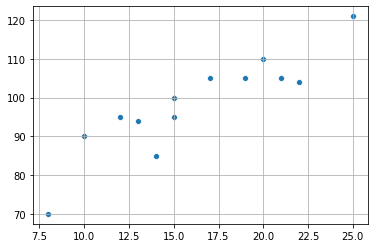

In [ ]:
# A회사의 광고비 지출이 매출에 어느정도 영향을 주는지 파악하기 위해 광고비와 매출액간의 관계를 조사해 봄
# 광고비와 매출액간의 연관성 파악을 위해 산포도로 시각화해 보세요
ad = [13,8,10,15,12,15,14,15,17,19,20,21,22,21,25]
sales = [94,70,90,100,95,100,85,95,105,105,110,105,104,105,121]

sns.scatterplot(ad, sales)
plt.grid()

# 상관관계correlation
* 두 변수 사이에 서로 주고 받는 관계가 있음
  + => 선형관계 여부와 연관성이 존재

* 양/음의 상관관계, 무 상관관계등 3가지 존재
  + => 각 변수의 관계를 기울기에 따라 양/음의 상관계수로 분류함

* 상관관계를 나타내는 정도를 상관계수라 하는데
* 한편, 강력하게 관계가 나타나기도 하지만 아리까리하게 있는듯 없는 듯한 관계도 있을수 있음

* 이러한 차이를 명확하게 하기 위해 상관계수를 사용
  + 피어슨 상관계수

# 공분산covariance
* 두 변수가 각 평균으로부터 떨어져 있는 정도를
구한 후 표본의 갯수로 나누어 계산한 것

* 공분산에서는 x와 y의 편차들을 서로 곱해주는데, 그 이유는 두 변수간의 관계가 편차들의 곱에 반영이 되기 때문.
* 하나의 x값이 평균보다 클 때 y도 평균보다 크면 두 편차의 곱은 양수.
* 반면 한 x값이 평균보다 클 때 y는 평균보다 작으면 편차의 곱으은 음수가 되는 점을 이용한 것.
* 곱한 값들을 모두 더해 양의 관계가 우세한지 음의 관계가 우세한지 측정.

* 결과가 양수 또는 음수로 나올수 있음
  + 양수 -> 양의 상관관계 있음 (x증가->y증가)
  + 음수 -> 음의 상관관계 있음 (x증가->y감소)

In [ ]:
# 광고비와 매출액의 관련성 여부를 알아보기 위해 공분산 계산
# numpy패키지의 cov 함수를 사용
# np.cov(ad, sales)
print(np.cov(ad, sales)[0,1])

50.24761904761905


5.61111111111111


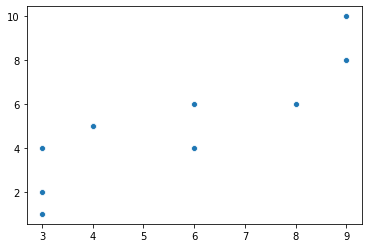

In [ ]:
# 다음 x, y 에 대해 공분산 계산
# x : 8 3 6 6 9 4 3 9 3 4
# y : 6 2 4 6 10 5 1 8 4 5

x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

sns.scatterplot(x, y)

print(np.cov(x, y)[0,1])

# 상관계수 
* 두 변수가 함께 변하는 정도를 -1~1 범위의 수치로 나타낸 것
* 단위로 인한 공분산의 차이를 어느 정도 보완해 줌
* 일반적으로 칼피어슨이 개발한 피어슨 상관계수를 사용함
* numpy의 corrcoef 함수를 사용함

### 상관계수 범위에 따른 상관정도 해석
   + -1.0 ~ -0.7  : 매우 강한 음의 상관관계 있음
   + -0.7 ~ -0.3  : 강한 음의 상관관계 있음
   + -0.3 ~ -0.1  : 약한 음의 상관관계 있음
   + -0.1 ~ 0.1   : 상관관계 없음
   + 0.3 ~ 0.1    : 약한 양의 상관관계 있음
   + 0.7 ~ 0.3    : 강한 양의 상관관계 있음
   + 1.0 ~ 0.7    : 매우 강한 양의 상관관계 있음

In [ ]:
# 광고비와 매출액의 관련성 여부를 알아보기 위해 상관계수 계산
# np.corrcoef(ad, sales)
print(np.corrcoef(ad, sales)[0,1])

0.8879209022406115


In [ ]:
# x, y 에 대해 상관계수 계산
print(np.corrcoef(x, y)[0,1])

0.8625172792135779


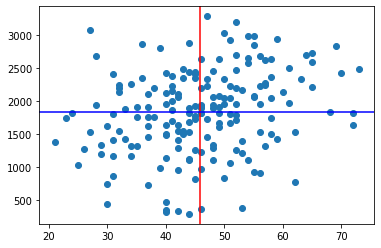

In [ ]:
# applewood 자동차판매 데이터를 기초로
# 구매자 연령과 판매이익간의 상관계수를 계산하고 상관분석을 하시오
import re

aw = pd.read_csv('https://raw.githubusercontent.com/siestageek/bigdataset/master/applewood.txt', 
                 sep=' ', encoding='euc-kr')

age = aw['Age']
profit = aw['Profit']

profit = profit.replace(',', '', regex=True)
profit = profit.replace('\$', '', regex=True)
profit = profit.astype(int)

# 각 데이터를 기반으로 산포도 그려봄
mage = np.mean(age)
mprofit = np.mean(profit)

plt.axvline(x=mage, color='r')
plt.axhline(y=mprofit, color='b')
plt.scatter(age, profit)


In [ ]:
# 공분산과 상관계수 확인
print(np.cov(age, profit)[0,1])
print(np.corrcoef(age, profit)[0,1])
# => 판매자 연령과 판매이익은 그리 큰 상관관계가 없음

1774.4888268156421
0.26152899109728933


In [ ]:
# ex) 놀이동산parks 데이터를 이용해서
# 놀이기구rides와 전체 만족도의 상관관계를 분석하시오

parks = pd.read_csv('https://raw.githubusercontent.com/siestageek/bigdataset/master/parks.csv')
parks

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68
...,...,...,...,...,...,...,...,...
495,no,0,11.052577,90,72,68,90,46
496,yes,0,8.187740,91,83,82,91,47
497,no,2,45.177402,95,92,85,93,71
498,no,3,27.088380,83,83,80,88,54


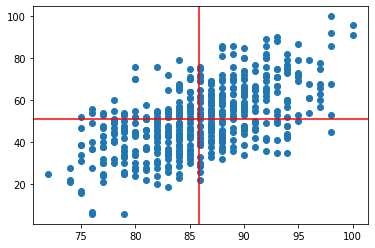

In [ ]:
# 각 데이터를 기반으로 산포도 그려봄
rides = parks['rides']
overall = parks['overall']

mrides = np.mean(rides)
moverall = np.mean(overall)

plt.axvline(x=mrides, color='r')
plt.axhline(y=moverall, color='r')
plt.scatter(rides, overall)

In [ ]:
# 공분산과 상관계수 확인
print(np.cov(rides, overall)[0,1])
print(np.corrcoef(rides, overall)[0,1])
# => 판매자 연령과 판매이익은 그리 큰 상관관계가 없음

50.82939078156314
0.5859862820034292


# 상관계수 행렬과 히트맵
* 보통 다수의 변수간의 상관계수를 구할때는 일일히 계산하지 않고
  상관계수 행렬을 사용함
* 하지만, 많은 변수들간의 상관계수를 표로 나타내기엔
  가독성이 좋지 않음
* 히트맵이라는 시각화도구를 사용하면 상관계수와 상관정도를
  색상으로 표현하기 때문에 가독성과 이해도가 좋아짐

In [ ]:
# 놀이동산parks 데이터를 이용해서 상관관계를 분석하시오
# 파이썬에서는 pandas 객체의 corr 함수를 이용하면 
# 상관계수 행렬을 나타낼 수 있음
parks.corr()

,num.child,distance,rides,games,wait,clean,overall
num.child,1.000000,-0.012136,-0.040260,0.004658,-0.020973,-0.013452,0.319480
distance,-0.012136,1.000000,-0.009526,-0.006503,-0.007392,0.003969,0.087126
rides,-0.040260,-0.009526,1.000000,0.455185,0.314200,0.789565,0.585986
games,0.004658,-0.006503,0.455185,1.000000,0.299105,0.516980,0.437468
wait,-0.020973,-0.007392,0.314200,0.299105,1.000000,0.367885,0.572622
clean,-0.013452,0.003969,0.789565,0.516980,0.367885,1.000000,0.639398
overall,0.319480,0.087126,0.585986,0.437468,0.572622,0.639398,1.000000


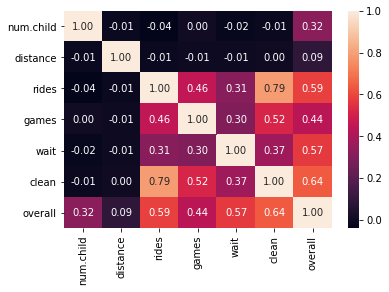

In [ ]:
sns.heatmap(data = parks.corr(), annot=True, fmt = '.2f')

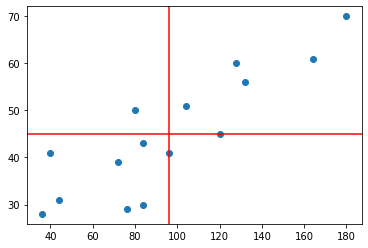

In [ ]:
# ex) 판매원 15명의 판촉횟수와 판매량 자료가 
# 다음과 같을때 전화횟수에 따라 판매량 변화가 있는지 알아보시오
p =  [96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84]
s = [41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30]

mp = np.mean(p)
ms = np.mean(s)
plt.axvline(x=mp, color='r')
plt.axhline(y=ms, color='r')
plt.scatter(p, s)

In [ ]:
print(np.cov(p, s)[0,1])
print(np.corrcoef(p, s)[0,1])

476.57142857142856
0.8646317910740129


# 상관계수 종류
* pearson : 등간/비율척도, 정규성을 띄어야 함
  + 상관관계를 모수적 관점에서 분석
  + numpy의 corrcoef함수 사용

* spearman : 순서척도, 정규성을 띄지않음 
  + 두 변수의 관계가 비선형적
  + 상관관계를 비모수적 관점에서 분석
  + scipy의 spearmanr함수 사용

* kendall : 순서척도, 정규성을 띄지않음
  + 두 변수의 관계가 비선형적
  + 표본이 작을 경우 spearman보다 훨씬 신뢰할 만함
  + 상관관계를 비모수적 관점에서 분석
  + scipy의 kindalltau함수 사용

# 상관계수 유의성 검정
* 판촉전화횟수와 판매량이 서로 관련없는데
상관계수가 양으로 나온것은 아닐까?
* 유의수준 0.05를 기준으로 가설검정 실시
* 상관계수의 검정통계량은 t분포를 이용

  + 귀무가설 : 상관계수 0이다 (연관성 없음)
  + 대립가설 : 상관계수 0이 아니다 (연관성 있음)
* 파이썬에서는 scipy의 pearsonr 함수를 이용해서 검정 실시  

In [ ]:
# 다음 x, y 에 대해 상관계수 검정 실시
# x : 8 3 6 6 9 4 3 9 3 4
# y : 6 2 4 6 10 5 1 8 4 5

x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

t, p = stats.pearsonr(x, y)
print(t, p)
# pvalue값이 0.05보다 작으므로 상관계수가 통계적으로 유의미하다 말할수 있음

(0.862517279213578, 0.0013196539142000013)


In [ ]:
# ex) 판매원 15명의 판촉횟수와 판매량 자료간의 
# 상관계수에 대한 유의성 검정을 실시하세요

t, p = stats.pearsonr(p, s)
print(p)
# pvalue값이 0.05보다 작으므로 상관계수가 통계적으로 유의미하다 말할수 있음

TypeError: ignored

In [ ]:
# ex) applewood 데이터를 기초로 해서 구매자 연령과 판매이익의 
# 상관관계에 대한 유의성 검정을 실시하세요

t, p = stats.pearsonr(age, profit)
print(p)
# pvalue값이 0.05보다 작으므로 상관계수가 통계적으로 유의미하다 말할수 있음

0.000390742532747444


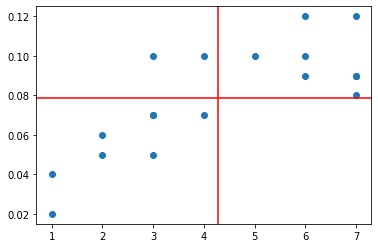

In [ ]:
# ex) 어느 대학교 학생회에서는 학생이 마시는 맥주와 혈중알콜농도 
# 사이 관계를 알고자 한다. 18명의 학생을 확률표본추출하여
# 맥주캔 500ml을 마시게 하고 30분후 경찰서에서 혈중알콜농도를 측정하였음
# 시음량과 혈중알콜농도사이에는 어떤 상관관계가 있는가? 
# 상관계수 유의성 검정도 실시하시오

beer = [6,7,7,4,5,3,3,6,6,3,3,7,1,4,2,7,2,1]
blood = [0.1, 0.09, 0.09, 0.1, 0.1, 0.07, 0.1, 0.12, 
           0.09, 0.07,0.05,0.08,0.04,0.07,0.06,0.12,0.05,0.02]

mbeer = np.mean(beer)
mblood = np.mean(blood)

plt.axvline(x=mbeer, color='red')
plt.axhline(y=mblood, color='red')
plt.scatter(beer, blood)

In [ ]:
# 시음량과 알콜농도간의 상관계수와 유의성검정 실시
print(np.cov(beer, blood)[0,1])
print(np.corrcoef(beer, blood)[0,1])
t, p = stats.pearsonr(beer, blood)
print(p)

# 상관계수가 0.78이므로 시음량과 알콜농도 사이에 강한 상관관계가 있을 가능성이 존재함
# pvalue값이 0.05보다 작으므로 상관계수가 통계적으로 유의미하다 말할수 있음

0.04562091503267973
0.7787952557356483
0.00014011286878354507


# 상관분석시 유의사항
* 독립변수와 종속변수간 연관성 분석 목적
* 그래프로 상관정도를 시각적으로 확인해랴 할 필요 존재
* 만일, 두 변수간의 관계가 곡선형태라면 스피어만이나 켄달 방식 사용
* 두 변수의 상관관계는 인과관계를 담보하지 않음
* 이질적인 집단의 합은 '심슨의 역설'을 유발할 수 있음
   + 각 집단별 상관관계와 전체 총합의 상관관계는 다를 수 있음
   + 즉, 상관분석 결과가 예상과 다를 경우, 이질적인 하위집단들이
     존재하는지 살펴봐야 할 수도 있음

# 심슨의 역설

* 각 부분에 대한 평균이 크다고 해서 전체에 대한 평균이 크지 않다는 법칙
* 즉, 각각의 변수에 신경쓰지 않고 전체 통계 결과를 유추하다 발생하는 오류

* ex) 공학부에서 900명의 학생을, 식품영양학과에서 100명의 학생을 모집한다고 했을때 남여학생이 각각 1000명 지원했음

* 공학부 합격자 비율

| - | 지원자  |  합격자  |  합격율 |
| --- | --- | --- | --- |
| 남학생 | 900 | 720  | 80% |
| 여학생 | 200 | 180  | 90% |

* 식품영양부 합격자 비율

| -  | 지원자  |  합격자  |  합격율 |
| -- | --    | --     | -- | 
| 남학생 | 100 | 10  | 10% |
| 여학생 | 800 | 90  | 11.25% |

+ 전체 합격자 비율 (남학생 높음)

| -  | 지원자  |  합격자  |  합격율 |
| -- | --    | --     | -- | 
| 남학생 | 1000 | 730  | 73% |
| 여학생 | 1000 | 270  | 27% |

* 각 모집단위에서는 여학생의 합격비율이 남학생보다 높은것으로 나타남
* 전체 모집단에서도 역시 여학생의 합격비율이 높을꺼라고 예상했지만
  실제로는 남학생의 합격비율이 더 높게 나옴(!!)
* 즉, 단일그룹에서 적용된 어떤 법칙이 전체그룹에는 적용되지 않음
* 통계의 함정
 + 각 그룹의 표본의 크기가 일정하지 않으면 가중치를 부여해서
  동일한 비율로 조정해야 할 필요가 있음

# 다양한 종류의 상관계수

![](https://github.com/siestageek/bigdataset/blob/master/20200724002.png?raw=true)